# Support Vector Machine for Automatic Speech Recognition

---
https://www.kaggle.com/anmour/svm-using-mfcc-features

https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85 : example of SVM

https://github.com/HareeshBahuleyan/music-genre-classification :code
https://www.groundai.com/project/music-genre-classification-using-machine-learning-techniques/1 :theory




( https://link.springer.com/chapter/10.1007/978-3-540-71505-4_11 )
Hidden Markov Models (HMMs) are, undoubtedly, the most employed core technique for Automatic Speech Recognition (ASR). Nevertheless, we are still far from achieving high-performance ASR systems.
The SVMs are effective discriminative classifiers with several outstanding characteristics, namely: their solution is that with maximum margin; they are capable to deal with samples of a very higher dimensionality; and their convergence to the minimum of the associated cost function is guaranteed.

In [1]:
#import numpy as np 
#from mega import Mega
#import os
#import zipfile
#from zipfile import ZipFile 
#import random
#import numpy as np
#from sklearn.model_selection import train_test_split
#from matplotlib import pyplot as plt
#from sklearn.svm import SVC
#import pandas as pd
#from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
#import itertools
#from itertools import cycle

In [15]:
import numpy as np 
import os
from matplotlib import pyplot as plt
from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import f1_score, accuracy_score

In [16]:
path=r"C:\Users\Goller\Desktop\audio-event-tagging\data\Audio"
os.chdir(path)

In [17]:
import sys
sys.path.append(r'C:\Users\Goller\Desktop\audio-event-tagging\src\utils')
import load_file as ld
X_train,X_test,y_train,y_test=ld.get_data(path)

Fine primo ciclo
Fine Secondo ciclo


In [18]:
label_dict = {'Animal':0,
              'Humans':1,
              'Natural':2,
             }

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm=np.round(cm, 2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm = True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(label_dict))
    print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.2f}'.format(f1_score(y_test, pred, average='macro')))
    print('ROC AUC = {0:.3f}'.format(roc_auc_score(y_true=one_hot_true, y_score=pred_probs, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=label_dict.keys())

In [20]:
# Train
svm_classifier = SVC(C=10000.0, probability = True, kernel='rbf')
svm_classifier.fit(X_train, y_train)

# Predict
pred_probs = svm_classifier.predict_proba(X_test)

Test Set Accuracy =  0.60
Test Set F-score =  0.59
ROC AUC = 0.752
Normalized confusion matrix
[[0.71 0.14 0.15]
 [0.27 0.36 0.36]
 [0.14 0.16 0.7 ]]
Wall time: 110 ms


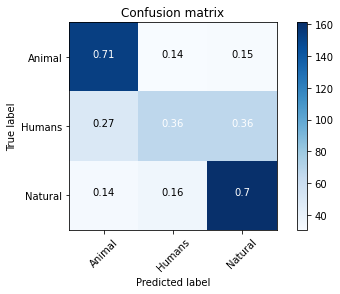

In [34]:
%%time
# Results
display_results(y_test, pred_probs)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_probs))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets